# Earthquake Analysis
_______

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

import squarify 

import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')

Lets Import the dataset

In [44]:
df = pd.read_csv('earthquake_data.csv')

In [45]:
df.head()

title  magnitude         date_time  \
0  M 7.0 - 18 km SW of Malango, Solomon Islands        7.0  22-11-2022 02:03   
1      M 6.9 - 204 km SW of Bengkulu, Indonesia        6.9  18-11-2022 13:37   
2                                      M 7.0 -         7.0  12-11-2022 07:09   
3           M 7.3 - 205 km ESE of Neiafu, Tonga        7.3  11-11-2022 10:48   
4                                      M 6.6 -         6.6  09-11-2022 10:14   

   cdi  mmi  alert  tsunami  sig net  nst   dmin   gap magType    depth  \
0    8    7  green        1  768  us  117  0.509  17.0     mww   14.000   
1    4    4  green        0  735  us   99  2.229  34.0     mww   25.000   
2    3    3  green        1  755  us  147  3.125  18.0     mww  579.000   
3    5    5  green        1  833  us  149  1.865  21.0     mww   37.000   
4    0    2  green        1  670  us  131  4.998  27.0     mww  624.464   

   latitude  longitude                  location continent          country  
0   -9.7963    159.596  Malango, Solomon Islands   Oceania  Solomon Islands  
1   -4.9559    100.738       Bengkulu, Indonesia       NaN              NaN  
2  -20.0508   -178.346                       NaN   Oceania             Fiji  
3  -19.2918   -172.129             Neiafu, Tonga       NaN              NaN  
4  -25.5948    178.278                       NaN       NaN              NaN

Checking the Dataset

In [46]:
print(df.shape)
print(df.duplicated().sum())
print(sum(df.isna().sum()))

(782, 19)
0
1246


There ar 1246 missing values

In [47]:
df.isnull().sum()[df.isnull().sum() > 0]

alert        367
location       5
continent    576
country      298
dtype: int64

So we have 5 missing values in **Locations** and hundreds of missing values in other 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [49]:
df.describe()

magnitude         cdi         mmi     tsunami          sig  \
count  782.000000  782.000000  782.000000  782.000000   782.000000   
mean     6.941125    4.333760    5.964194    0.388747   870.108696   
std      0.445514    3.169939    1.462724    0.487778   322.465367   
min      6.500000    0.000000    1.000000    0.000000   650.000000   
25%      6.600000    0.000000    5.000000    0.000000   691.000000   
50%      6.800000    5.000000    6.000000    0.000000   754.000000   
75%      7.100000    7.000000    7.000000    1.000000   909.750000   
max      9.100000    9.000000    9.000000    1.000000  2910.000000   

              nst        dmin         gap       depth    latitude   longitude  
count  782.000000  782.000000  782.000000  782.000000  782.000000  782.000000  
mean   230.250639    1.325757   25.038990   75.883199    3.538100   52.609199  
std    250.188177    2.218805   24.225067  137.277078   27.303429  117.898886  
min      0.000000    0.000000    0.000000    2.700000  -61.848400 -179.968000  
25%      0.000000    0.000000   14.625000   14.000000  -14.595600  -71.668050  
50%    140.000000    0.000000   20.000000   26.295000   -2.572500  109.426000  
75%    445.000000    1.863000   30.000000   49.750000   24.654500  148.941000  
max    934.000000   17.654000  239.000000  670.810000   71.631200  179.662000

### Visualizing the Dataset

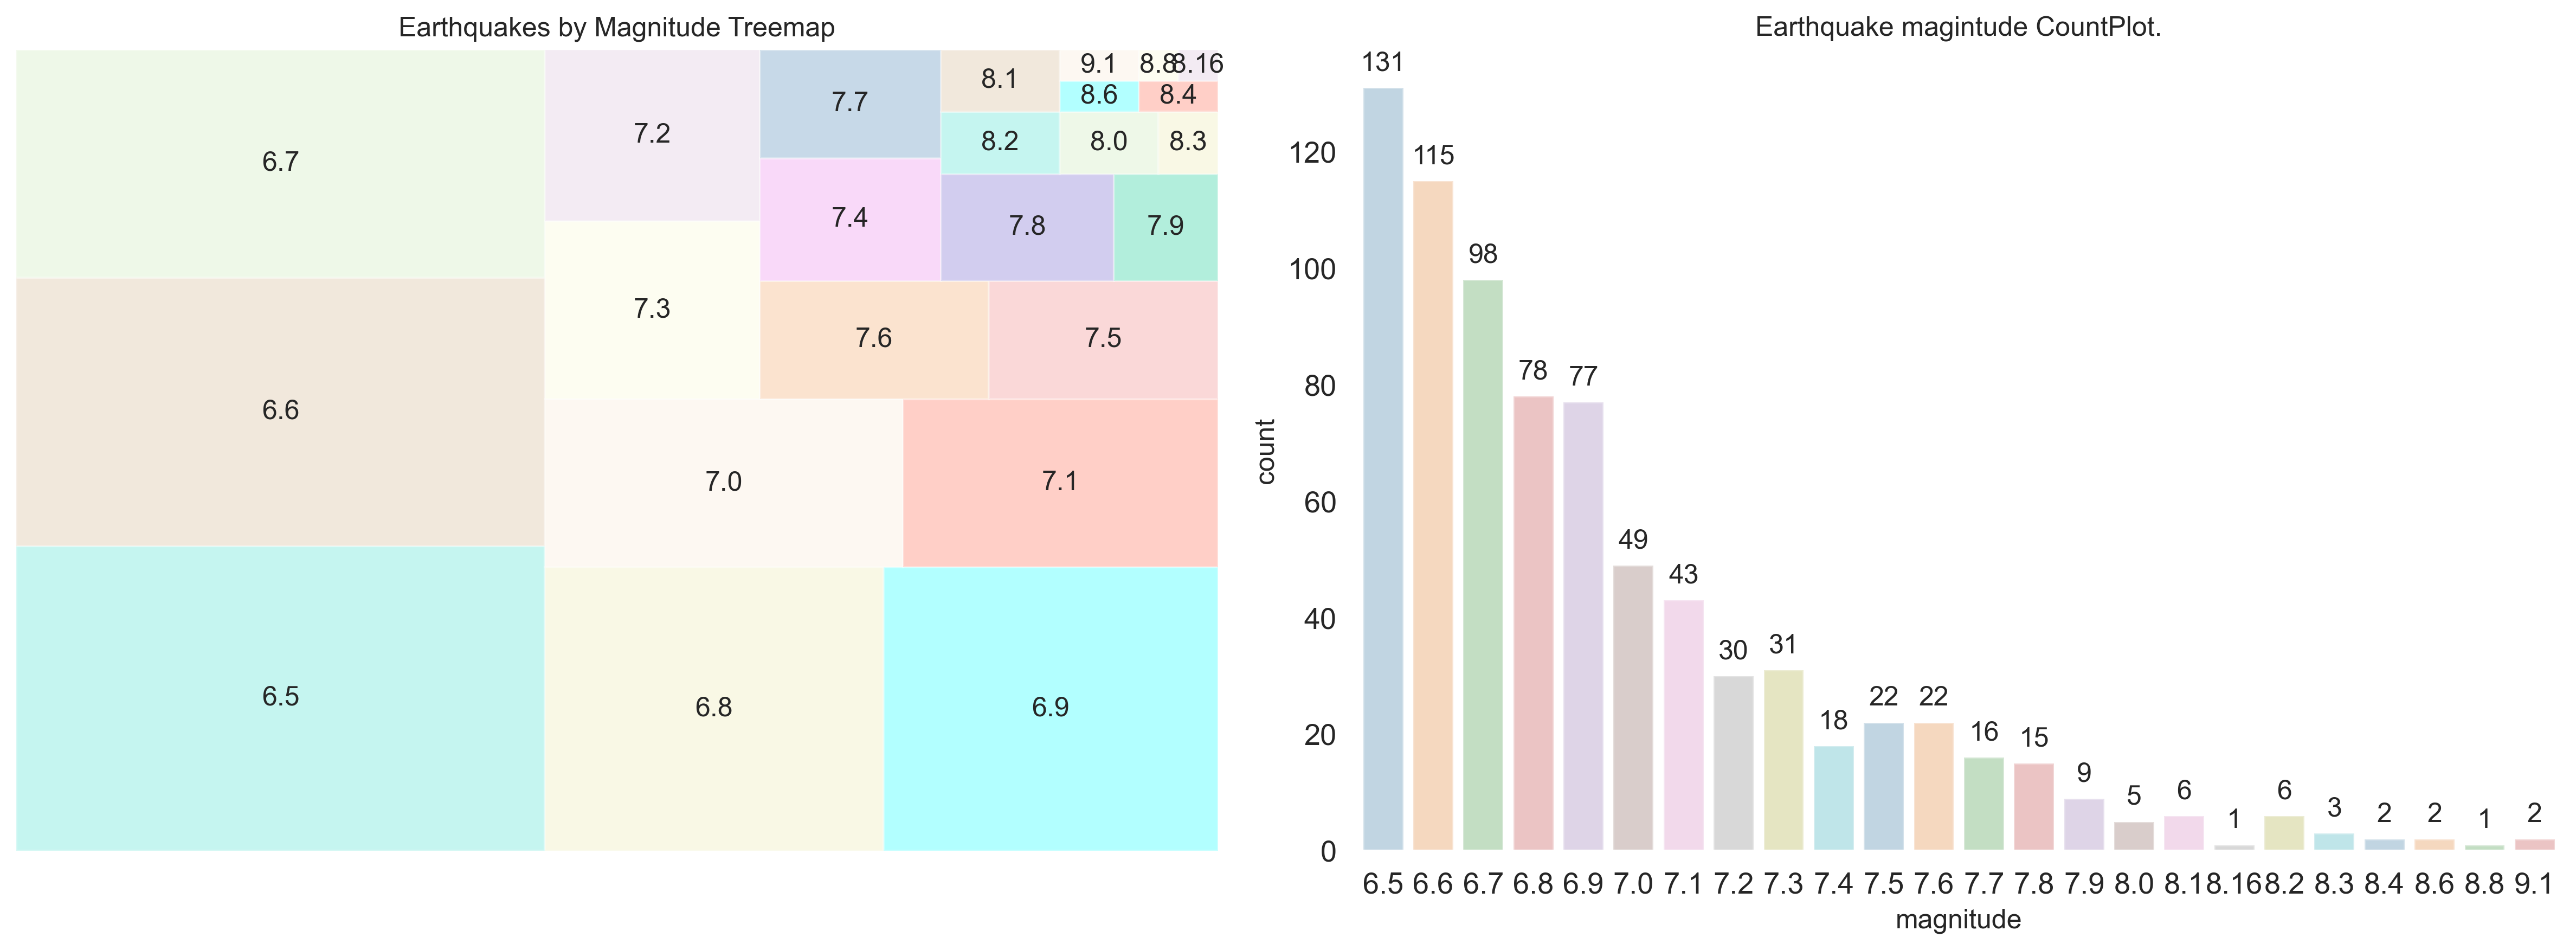

In [50]:
sns.set_theme(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':13,'ytick.labelsize':13, 'figure.autolayout':True, 'figure.dpi':300, 'savefig.dpi':300})
my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7','#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE', '#4682B4','#6A5ACD', '#00C78C')

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)

plt.title('Earthquakes by Magnitude Treemap')
labels = df['magnitude'].value_counts().index.tolist() 
sizes = df['magnitude'].value_counts().tolist()
squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=0.3)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Earthquake magintude CountPlot.")
ax = sns.countplot(x='magnitude', data=df, palette="tab10", alpha=0.3)
# to add label of each count on top we will run a for loop
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height() + 2), ha='center', va='bottom')


6.5 magnitude earthquakes are quite occured quite offen followed by 6.6, 6.7......... 

____
Using Histogram and box plots to identify the trends

First we'll see the values related to depth and significance

In [51]:
print("max:",df['depth'].max())
print("min:",df['depth'].min())

max: 670.81
min: 2.7


<Axes: title={'center': 'Earthquakes by Significance : Boxplot'}, xlabel='sig'>

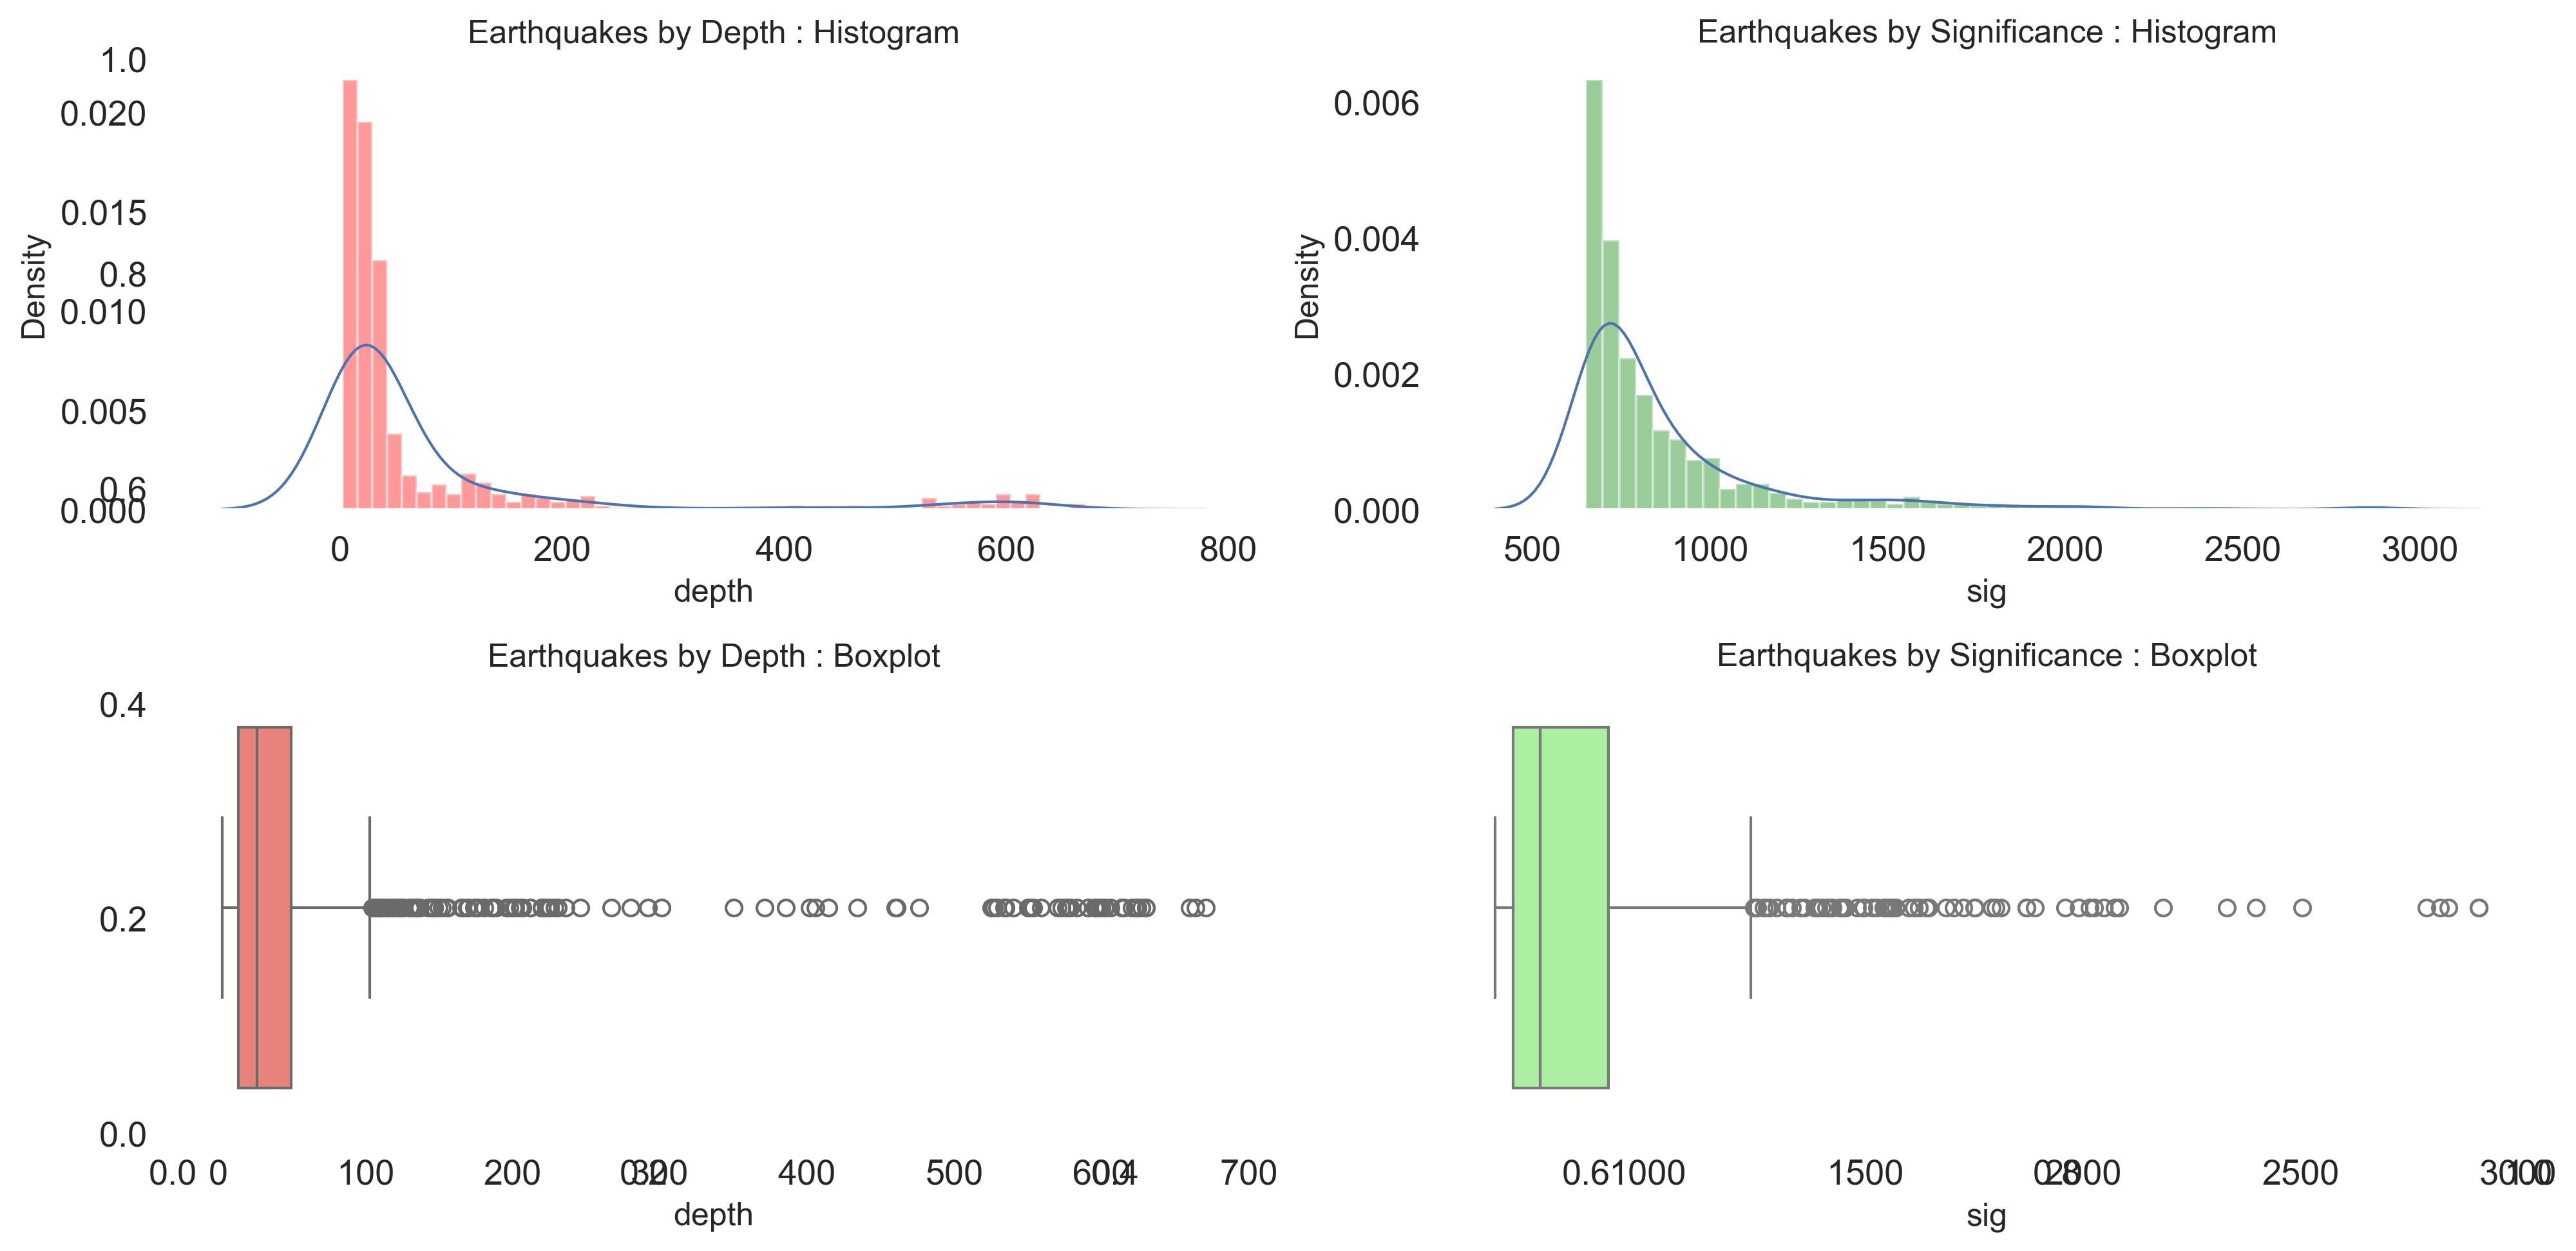

In [52]:
plt.subplots(figsize=(14,7))

plt.subplot(2,2,1)
plt.title("Earthquakes by Depth : Histogram")
sns.distplot(df['depth'], color='red', kde_kws={'linewidth':1, 'color': 'b'})

plt.subplot(2,2,2)
plt.title("Earthquakes by Significance : Histogram")
sns.distplot(df['sig'], color='green', kde_kws={'linewidth':1, 'color': 'b'})

plt.subplot(2,2,3)
plt.title("Earthquakes by Depth : Boxplot")
sns.boxplot(df['depth'], color='#fa7369', orient='h')

plt.subplot(2,2,4)
plt.title("Earthquakes by Significance : Boxplot")
sns.boxplot(df['sig'], color='#a3fc95', orient='h')




Lets see the relation between magnitude vs depth and magnitude vs significance

In [53]:
df[['sig', 'magnitude', 'depth', 'tsunami']].head()

sig  magnitude    depth  tsunami
0  768        7.0   14.000        1
1  735        6.9   25.000        0
2  755        7.0  579.000        1
3  833        7.3   37.000        1
4  670        6.6  624.464        1

<span style='color:#fff000'>lets plot them</span>

Text(0.5, 1.0, 'Magnitude Vs Significance')

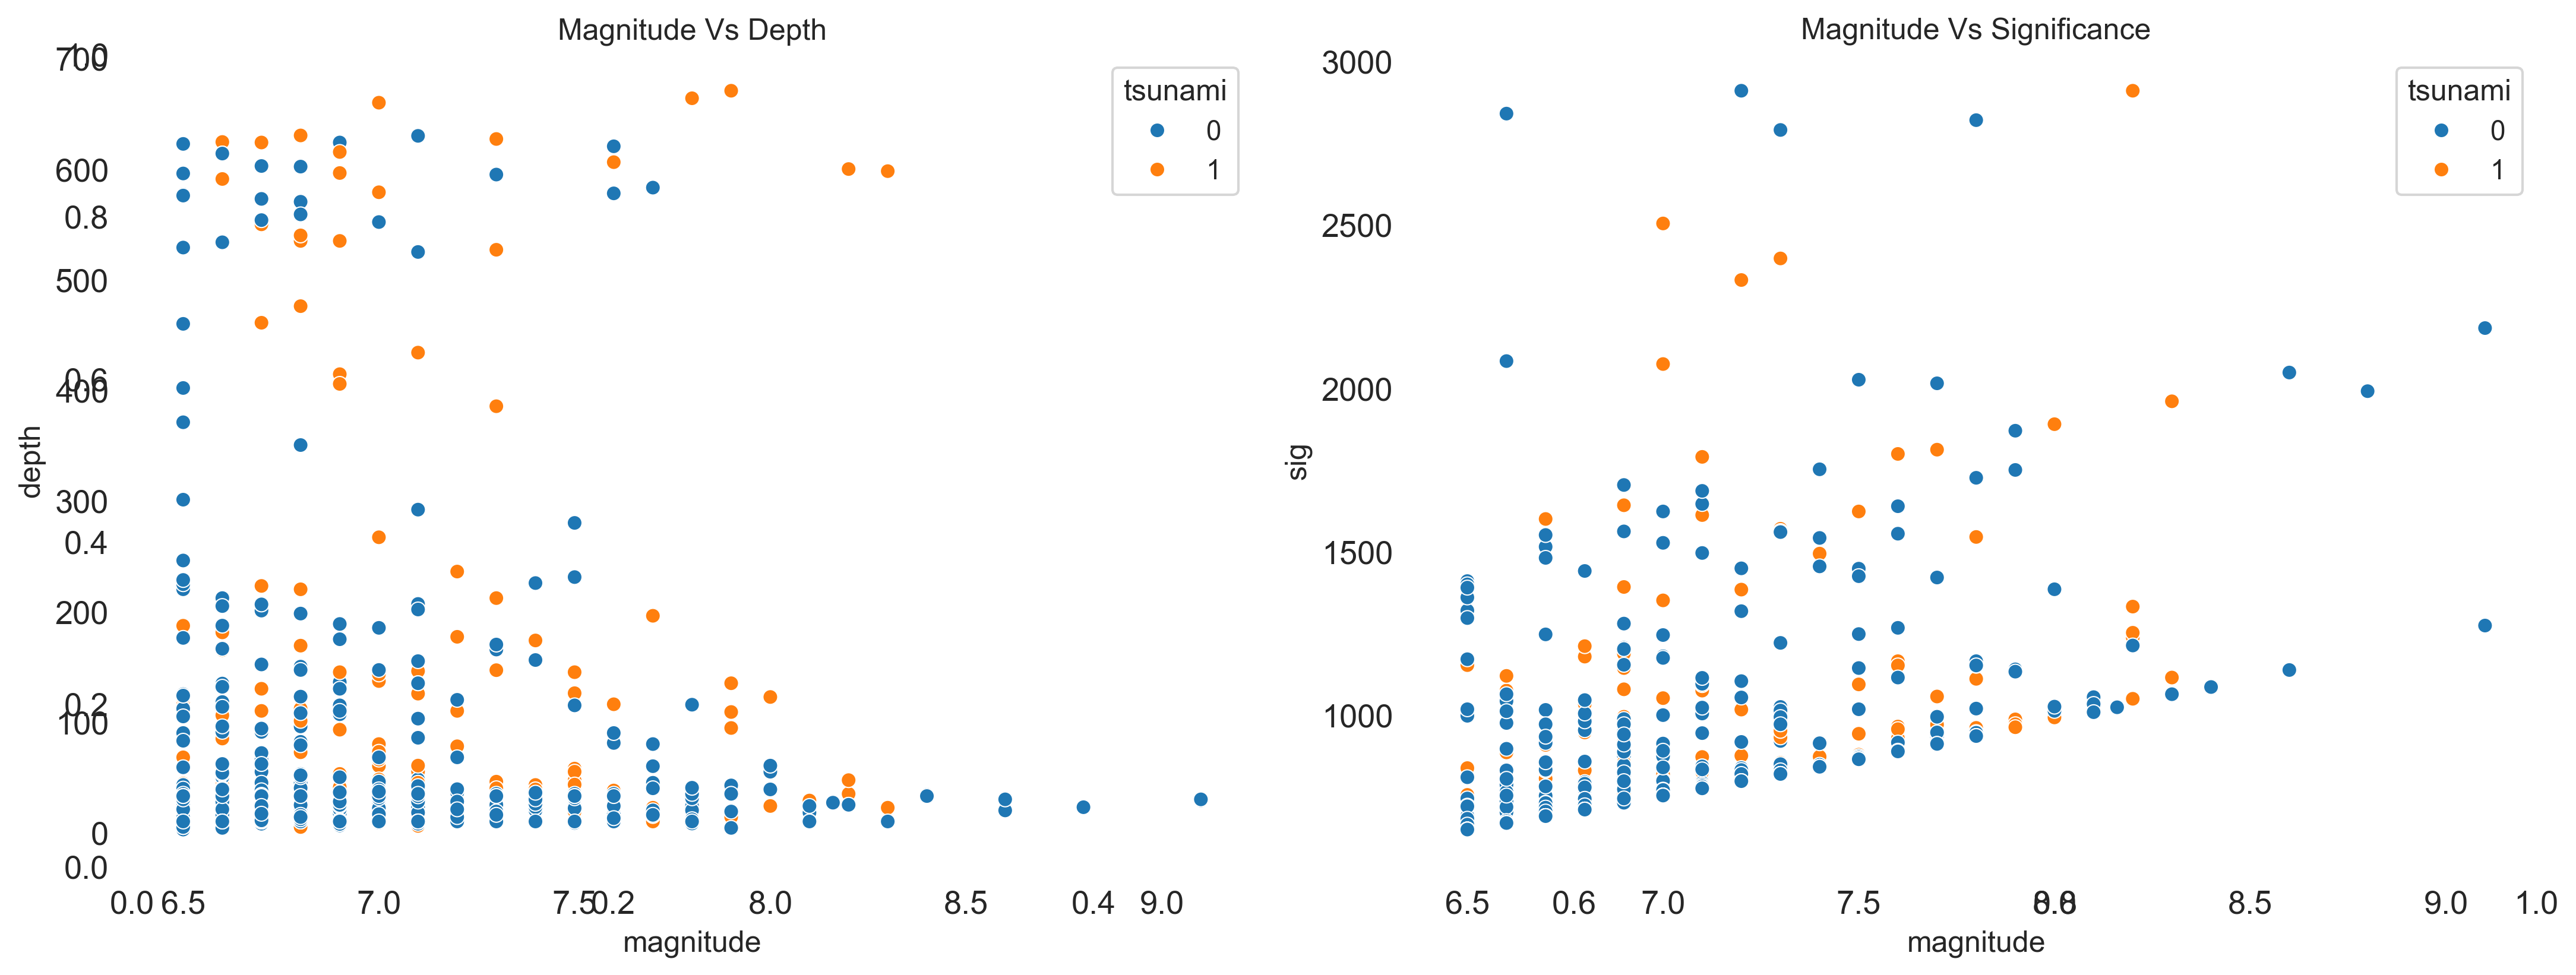

In [54]:
plt.subplots(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='magnitude', y='depth', hue='tsunami', palette='tab10')
plt.title("Magnitude Vs Depth")

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='magnitude', y='sig', hue='tsunami', palette='tab10')
plt.title("Magnitude Vs Significance")

_____
visualise earthquakes by type of magnitude measurement used

In [55]:
df[['magnitude', 'magType']].head(20).T

0    1    2    3    4    5    6    7    8    9    10   11   12  \
magnitude  7.0  6.9  7.0  7.3  6.6  7.0  6.8  6.7  6.8  7.6  6.9  6.5  7.0   
magType    mww  mww  mww  mww  mww  mwb  mww  mww  mww  mww  mww  mww  mww   

            13   14   15   16   17   18   19  
magnitude  7.6  6.6  6.6  7.0  6.5  7.2  6.9  
magType    mww  mww  mww  mww  mww  mww  mww

(Text(0, 0.5, ''), Text(0.5, 0, ''), ([], []))

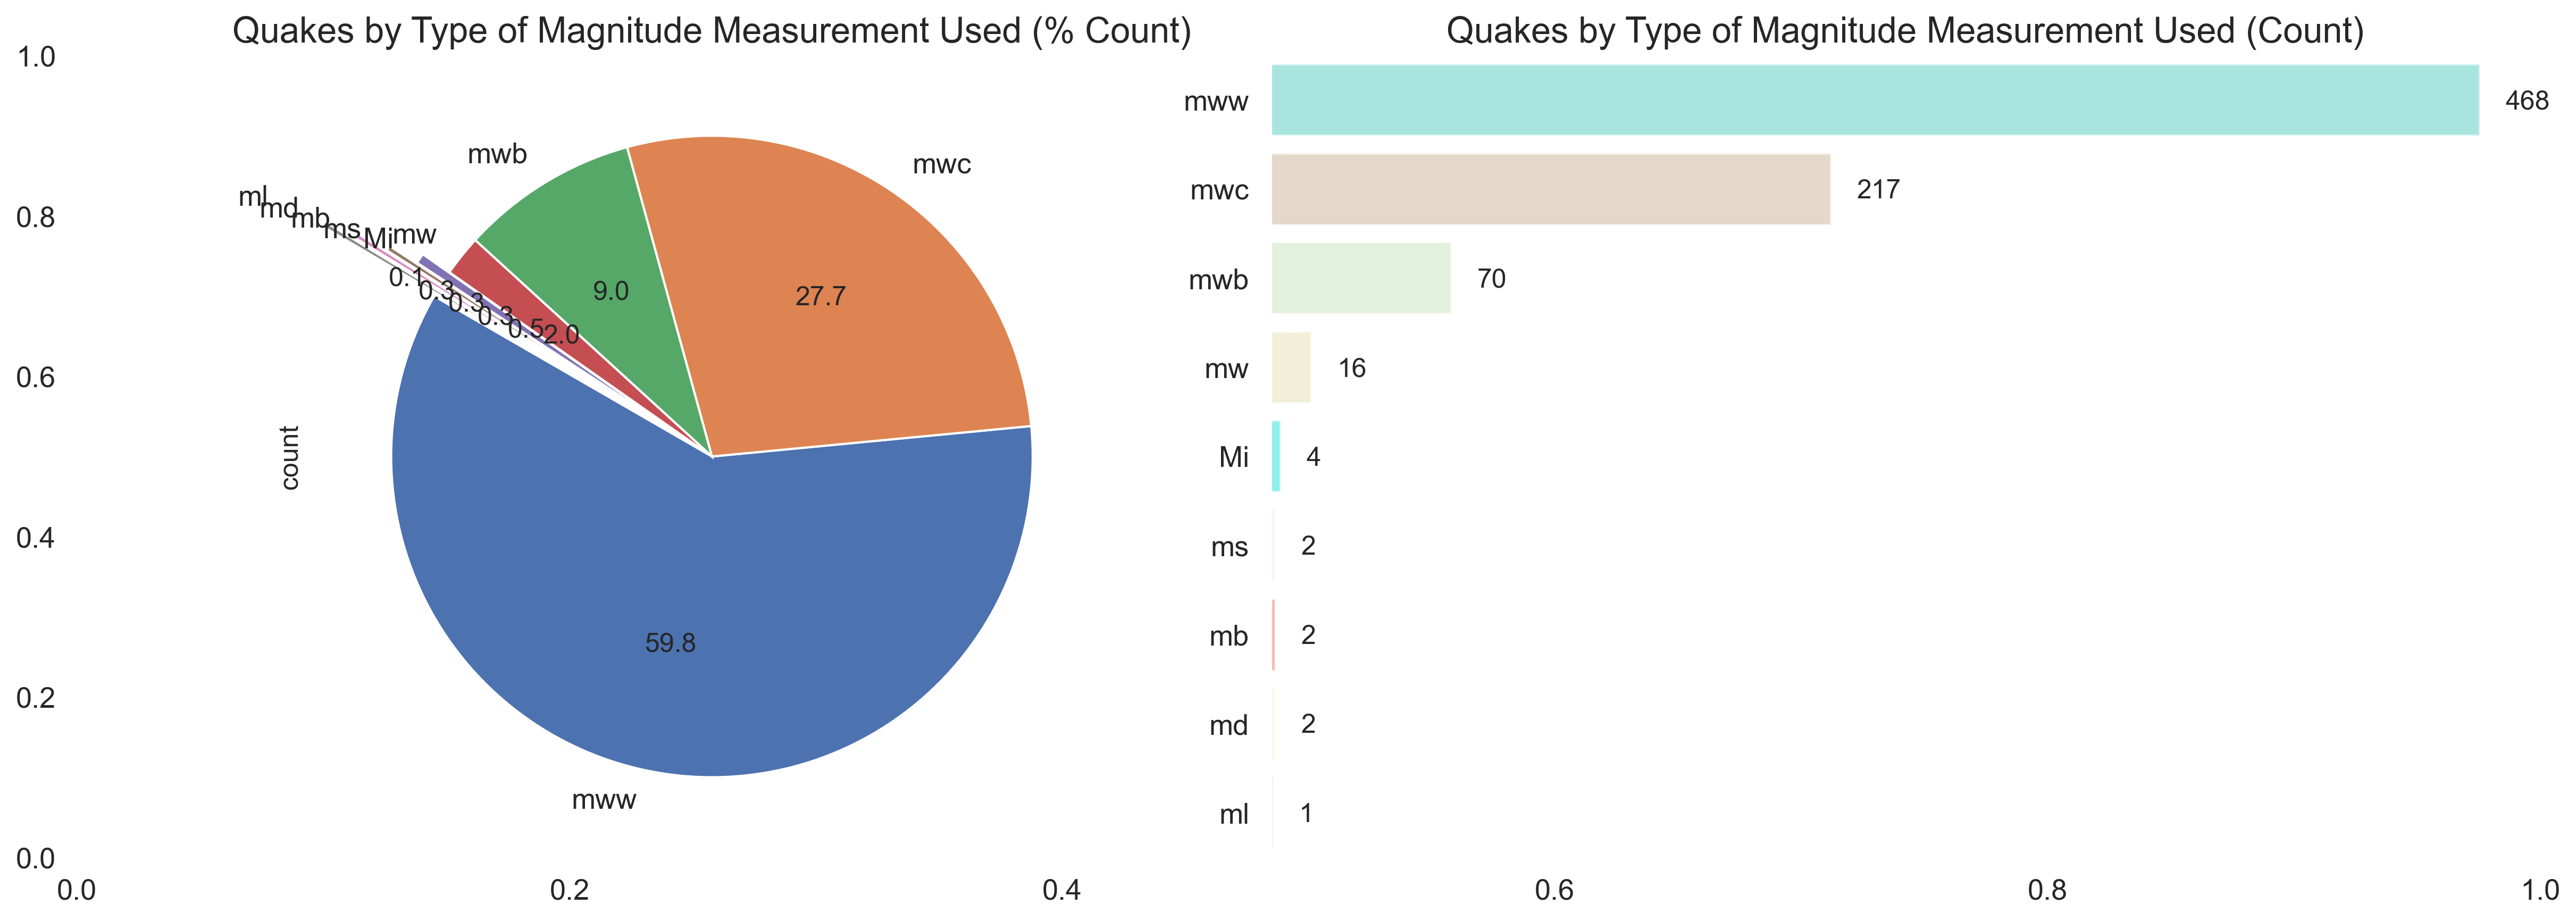

In [56]:
plt.subplots(figsize=(16,6))


plt.subplot(1,2,1)
plt.title('Quakes by Type of Magnitude Measurement Used (% Count)', fontsize=16)
my_xpl = [0.0, 0.0, 0.0, 0.0, 0.1, 0.20, 0.30, 0.40, 0.50]
df['magType'].value_counts().plot(kind='pie', startangle=150, autopct='%1.1f', explode=my_xpl)

plt.subplot(1,2,2)
plt.title('Quakes by Type of Magnitude Measurement Used (Count)', fontsize=16)
ax = sns.countplot(df, y='magType', palette=my_col, alpha=0.5, order=df['magType'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 10, p.get_y()+0.5))
plt.ylabel(None), plt.xlabel(None), plt.xticks([])


_____
## Let's analyse the data based on year, month and day

In [57]:
df.head()
df[['date_time']]

date_time
0    22-11-2022 02:03
1    18-11-2022 13:37
2    12-11-2022 07:09
3    11-11-2022 10:48
4    09-11-2022 10:14
..                ...
777  13-01-2001 17:33
778  10-01-2001 16:02
779  09-01-2001 16:49
780  01-01-2001 08:54
781  01-01-2001 06:57

[782 rows x 1 columns]

Let's convert this date to year, month, day, etc.

In [58]:
df['Date'] = pd.to_datetime(df['date_time']).dt.date
df['Year'] = pd.to_datetime(df['date_time']).dt.year
df['Month'] = pd.to_datetime(df['date_time']).dt.month
df['Day'] = pd.to_datetime(df['date_time']).dt.day
df['Hour'] = pd.to_datetime(df['date_time']).dt.hour

df[['date_time', 'Date', 'Year', 'Month', 'Day', 'Hour']].head(10)

date_time        Date  Year  Month  Day  Hour
0  22-11-2022 02:03  2022-11-22  2022     11   22     2
1  18-11-2022 13:37  2022-11-18  2022     11   18    13
2  12-11-2022 07:09  2022-11-12  2022     11   12     7
3  11-11-2022 10:48  2022-11-11  2022     11   11    10
4  09-11-2022 10:14  2022-11-09  2022     11    9    10
5  09-11-2022 09:51  2022-11-09  2022     11    9     9
6  09-11-2022 09:38  2022-11-09  2022     11    9     9
7  20-10-2022 11:57  2022-10-20  2022     10   20    11
8  22-09-2022 06:16  2022-09-22  2022      9   22     6
9  19-09-2022 18:05  2022-09-19  2022      9   19    18

Lets visualize the data by year, month, day, hour

((0.0, 110.0), Text(0, 0.5, ''), Text(0.5, 0, ''))

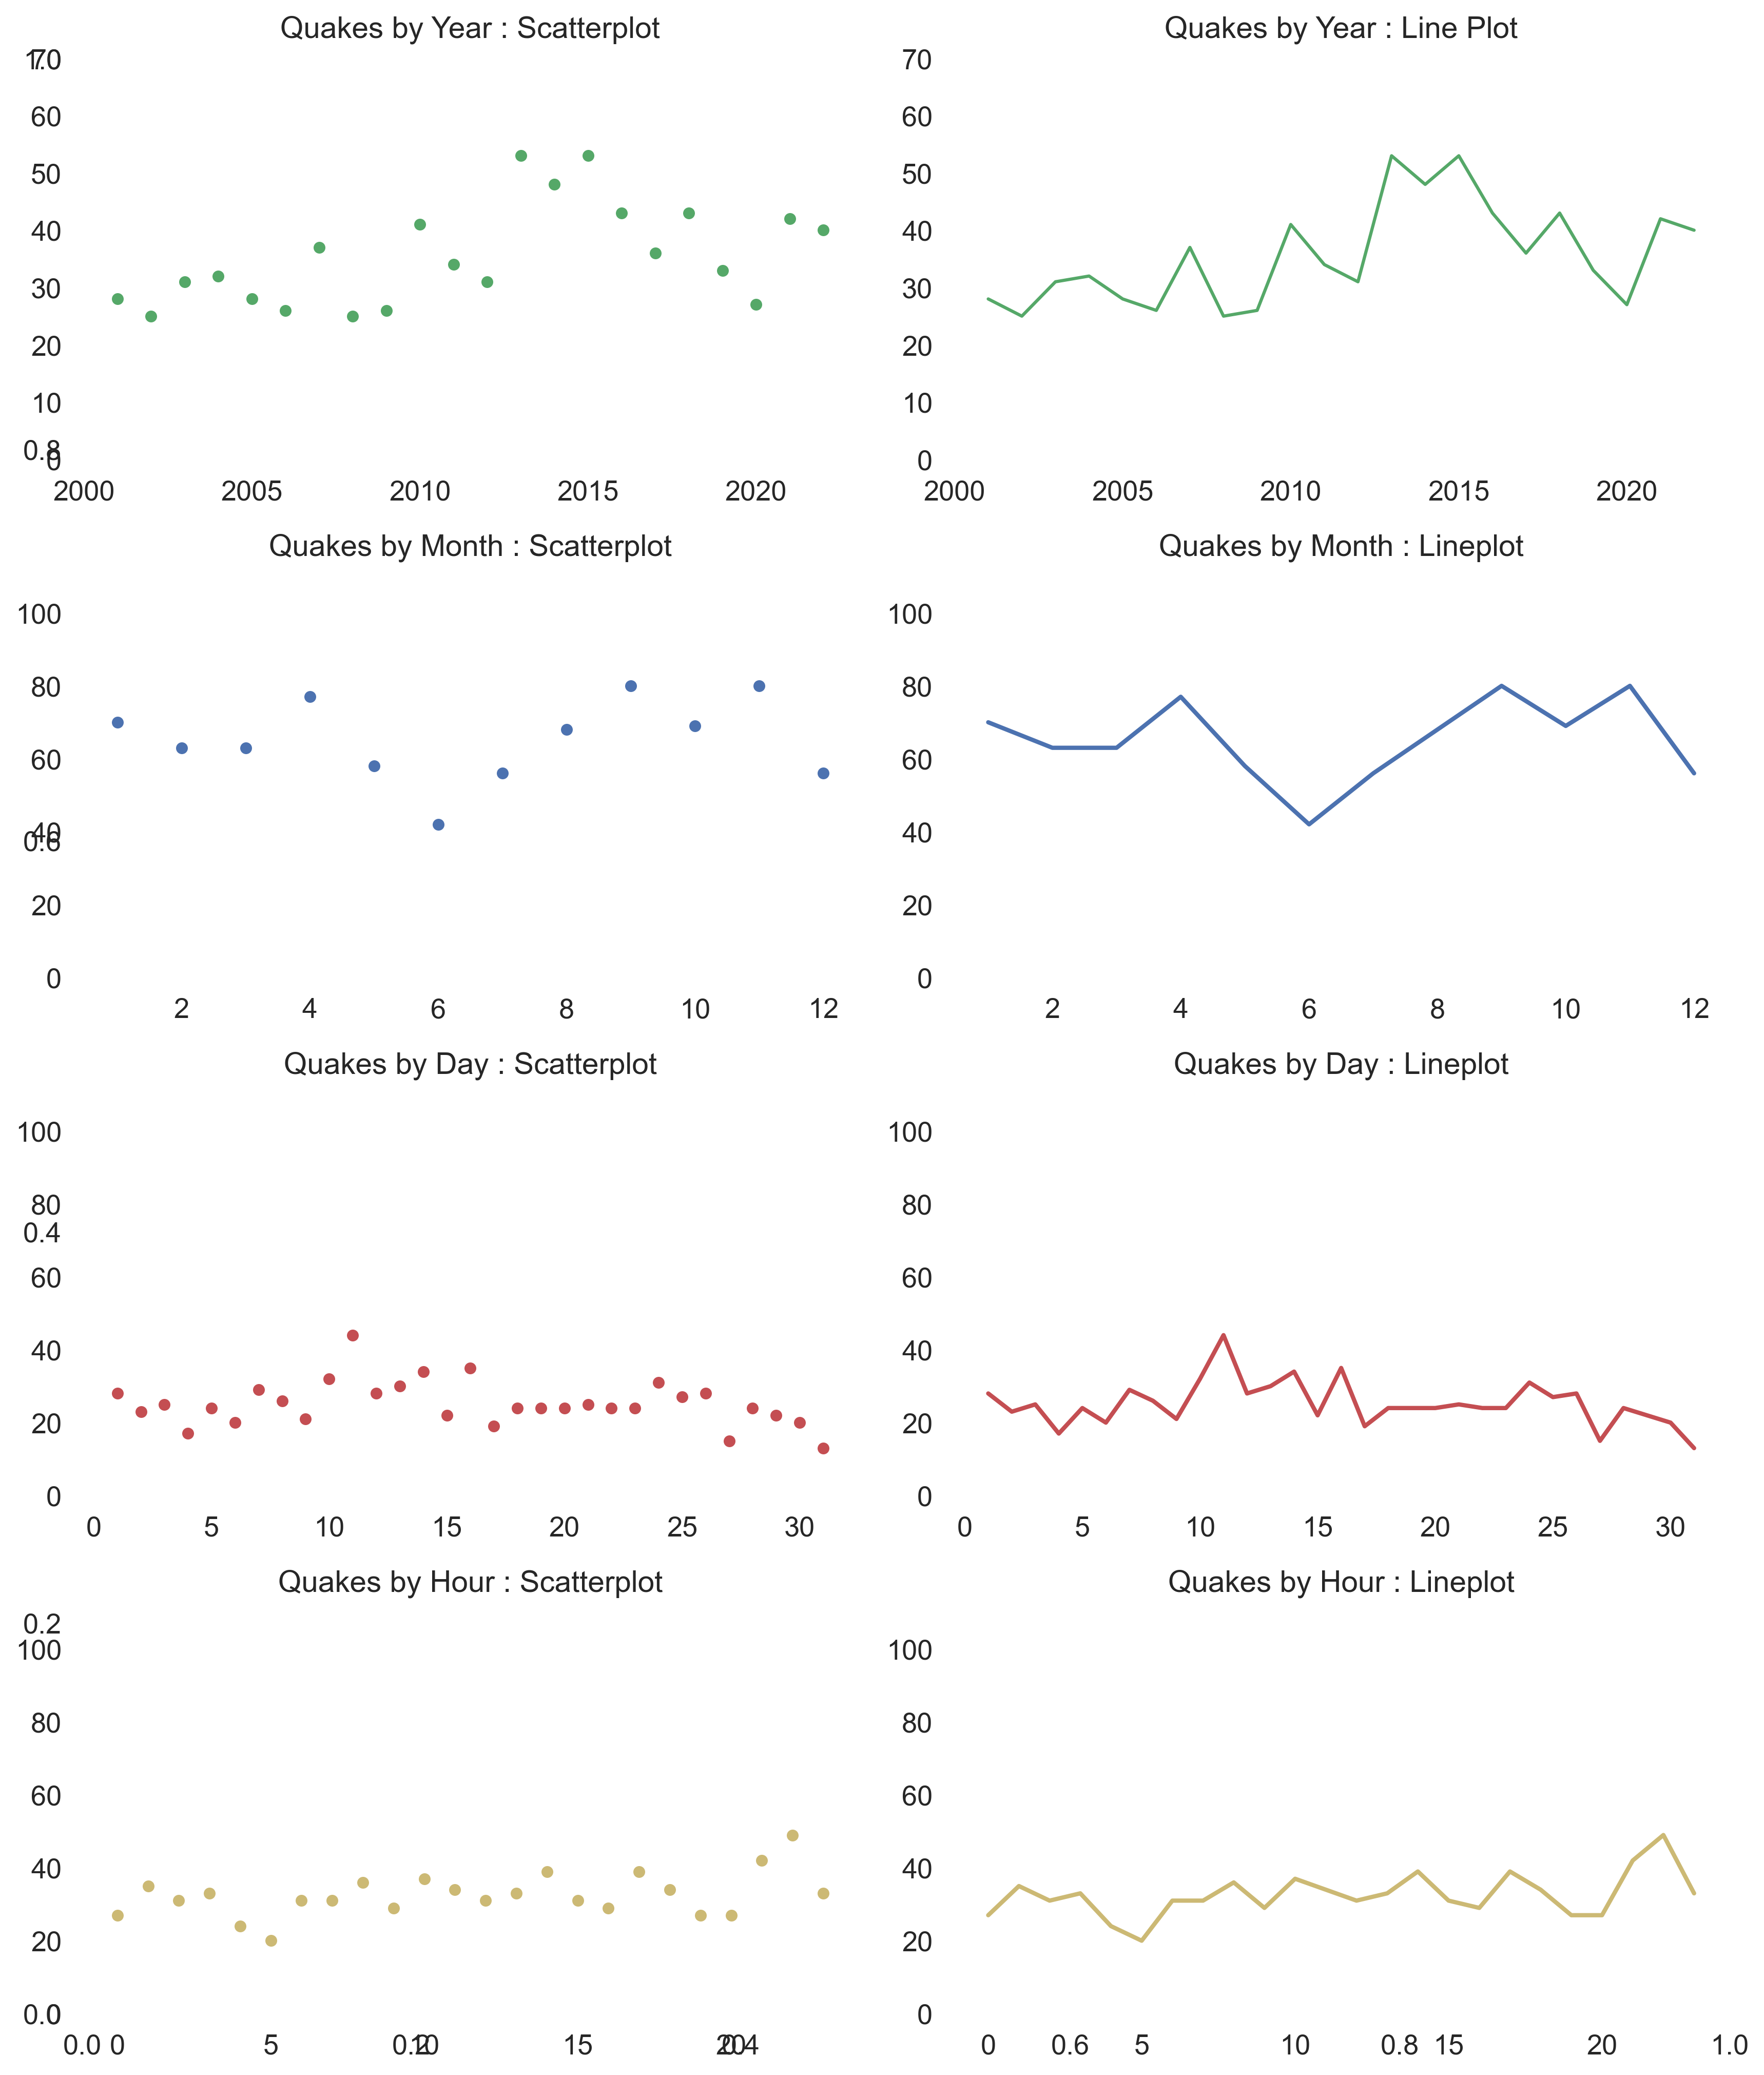

In [59]:
plt.subplots(figsize=(12,14))

## By Year
plt.subplot(4,2,1)
plt.title('Quakes by Year : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data=df['Year'].value_counts().sort_values(), color='g')
plt.ylim(0, 70), plt.ylabel(None), plt.xlabel(None)

plt.subplot(4,2,2)
plt.title('Quakes by Year : Line Plot', pad = 10, fontsize = 14)
sns.lineplot(data=df['Year'].value_counts().sort_values(), color='g')
plt.ylim(0, 70), plt.ylabel(None), plt.xlabel(None)

## By Month
plt.subplot(4,2,3)
plt.title('Quakes by Month : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data=df['Month'].value_counts().sort_values(), color='b')
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

plt.subplot(4,2,4)
plt.title('Quakes by Month : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Month'].value_counts().sort_values(), color='b', linewidth = 2)
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

## By Day
plt.subplot(4,2,5)
plt.title('Quakes by Day : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data=df['Day'].value_counts().sort_values(), color='r')
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

plt.subplot(4,2,6)
plt.title('Quakes by Day : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Day'].value_counts().sort_values(), color='r', linewidth = 2)
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

## By Hour
plt.subplot(4,2,7)
plt.title('Quakes by Hour : Scatterplot', pad = 10, fontsize = 14)
sns.scatterplot(data=df['Hour'].value_counts().sort_values(), color='y')
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

plt.subplot(4,2,8)
plt.title('Quakes by Hour : Lineplot', pad = 10, fontsize = 14)
sns.lineplot(data = df['Hour'].value_counts().sort_values(), color='y', linewidth = 2)
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

______
## We'll visualise the data by country

first we will split the location into countries

In [60]:
df['location'].head()

0    Malango, Solomon Islands
1         Bengkulu, Indonesia
2                         NaN
3               Neiafu, Tonga
4                         NaN
Name: location, dtype: object

In [61]:
df_r = df['location'].str.split(',', expand=True)
df_r.drop(columns=2, inplace=True)
print(df_r.head())

df['country'] = df['country'].fillna(df_r[1])  
print('\n', 'Missing values in the refined country column are : ', df['country'].isna().sum())

          0                 1
0   Malango   Solomon Islands
1  Bengkulu         Indonesia
2       NaN               NaN
3    Neiafu             Tonga
4       NaN               NaN

 Missing values in the refined country column are :  45


In [62]:
df_country=df.dropna(subset=['country','location','continent'], how='all')
print(df_country['country'].isnull().sum())

42


In [63]:
df_country['location']=df_country['location'].fillna('unknown')
print('\n', 'Missing location values After  : ', df_country['location'].isnull().sum())


 Missing location values After  :  0


In [64]:
df_country['country'] = df_country['country'].fillna(df_country['location'])
df_country['country'].isnull().sum()


0

Let's check the unique countries

In [65]:
df_country['country'].unique()

array(['Solomon Islands', ' Indonesia', 'Fiji', ' Tonga',
       'the Fiji Islands', 'Panama', 'Mexico', 'Taiwan', ' Vanuatu',
       'Papua New Guinea', "People's Republic of China",
       'the Kermadec Islands', 'Philippines', 'Brazil', 'Peru',
       'Argentina', ' Nicaragua', 'the Loyalty Islands', ' New Caledonia',
       ' Japan', 'Indonesia', ' New Zealand', 'Kermadec Islands region',
       ' Alaska', ' Cyprus', 'United States of America', 'Vanuatu region',
       'Antarctica', 'Vanuatu', 'South Sandwich Islands region', 'Haiti',
       ' Philippines', ' Panama', ' Wallis and Futuna',
       'Mauritius - Reunion region', 'Japan', ' Russia', 'Mongolia',
       ' Chile', 'Greece', 'central Mid-Atlantic Ridge', 'Chile',
       ' Solomon Islands', ' Greece', 'Russia', ' Jamaica', 'Turkey',
       ' Fiji',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       ' Australia', ' El Salvador', ' South Sandwich Islands', 'Ecuador',
       'Prince Edward Islands regi

First we remove all the extra spaces in the country column

In [66]:
df_country = df_country.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df_country.replace({'country': {"the Fiji Islands" : "Fiji region", "Fiji" : "Fiji region", 
                                "the Kermadec Islands" : "New Zealand region", "the Loyalty Islands" : "New Caledonia", 
                                "Vanuatu" : "Vanuatu region", "South Sandwich Islands" : "South Sandwich Islands region", 
                                "South Georgia and the South Sandwich Islands" : "South Sandwich Islands region", 
                                "Prince Edward Islands region" : "Canada", "Okhotsk" : "Russia region", 
                                "off the west coast of northern Sumatra" : "Indonesia", 
                                "Philippine Islands region" : "Philippines", 
                                "the Kuril Islands" : "Kuril Islands", 
                                "United Kingdom of Great Britain and Northern Ireland (the)": "UK", 
                                "People's Republic of China": "CHINA", "United States of America": "USA", 
                                "Alaska": "USA", "Aleutian Islands, Alaska" : "USA", "California" : "USA", 
                                "India" : "India region", "Russia" : "Russia region", "New Zealand" : "New Zealand region", 
                                "Japan region" : "Japan"}}, inplace=True)

df_country['country'].unique()

array(['Solomon Islands', 'Indonesia', 'Fiji region', 'Tonga', 'Panama',
       'Mexico', 'Taiwan', 'Vanuatu region', 'Papua New Guinea', 'CHINA',
       'New Zealand region', 'Philippines', 'Brazil', 'Peru', 'Argentina',
       'Nicaragua', 'New Caledonia', 'Japan', 'Kermadec Islands region',
       'USA', 'Cyprus', 'Antarctica', 'South Sandwich Islands region',
       'Haiti', 'Wallis and Futuna', 'Mauritius - Reunion region',
       'Russia region', 'Mongolia', 'Chile', 'Greece',
       'central Mid-Atlantic Ridge', 'Jamaica', 'Turkey', 'UK',
       'Australia', 'El Salvador', 'Ecuador', 'Canada',
       'Svalbard and Jan Mayen', 'Venezuela', 'Bolivia', 'Honduras',
       'Bouvet Island region', 'Costa Rica', 'Iran', 'Guatemala',
       'Botswana', 'Italy', 'Myanmar', 'Northern Mariana Islands',
       'Afghanistan', 'India region', 'Tajikistan', 'Aleutian Islands',
       'Barbados', 'Nepal', 'Guam', 'Micronesia region', 'Pakistan',
       'Colombia', 'northern Mid-Atlantic Ridge',

Now we'll plot country wise data with barplots

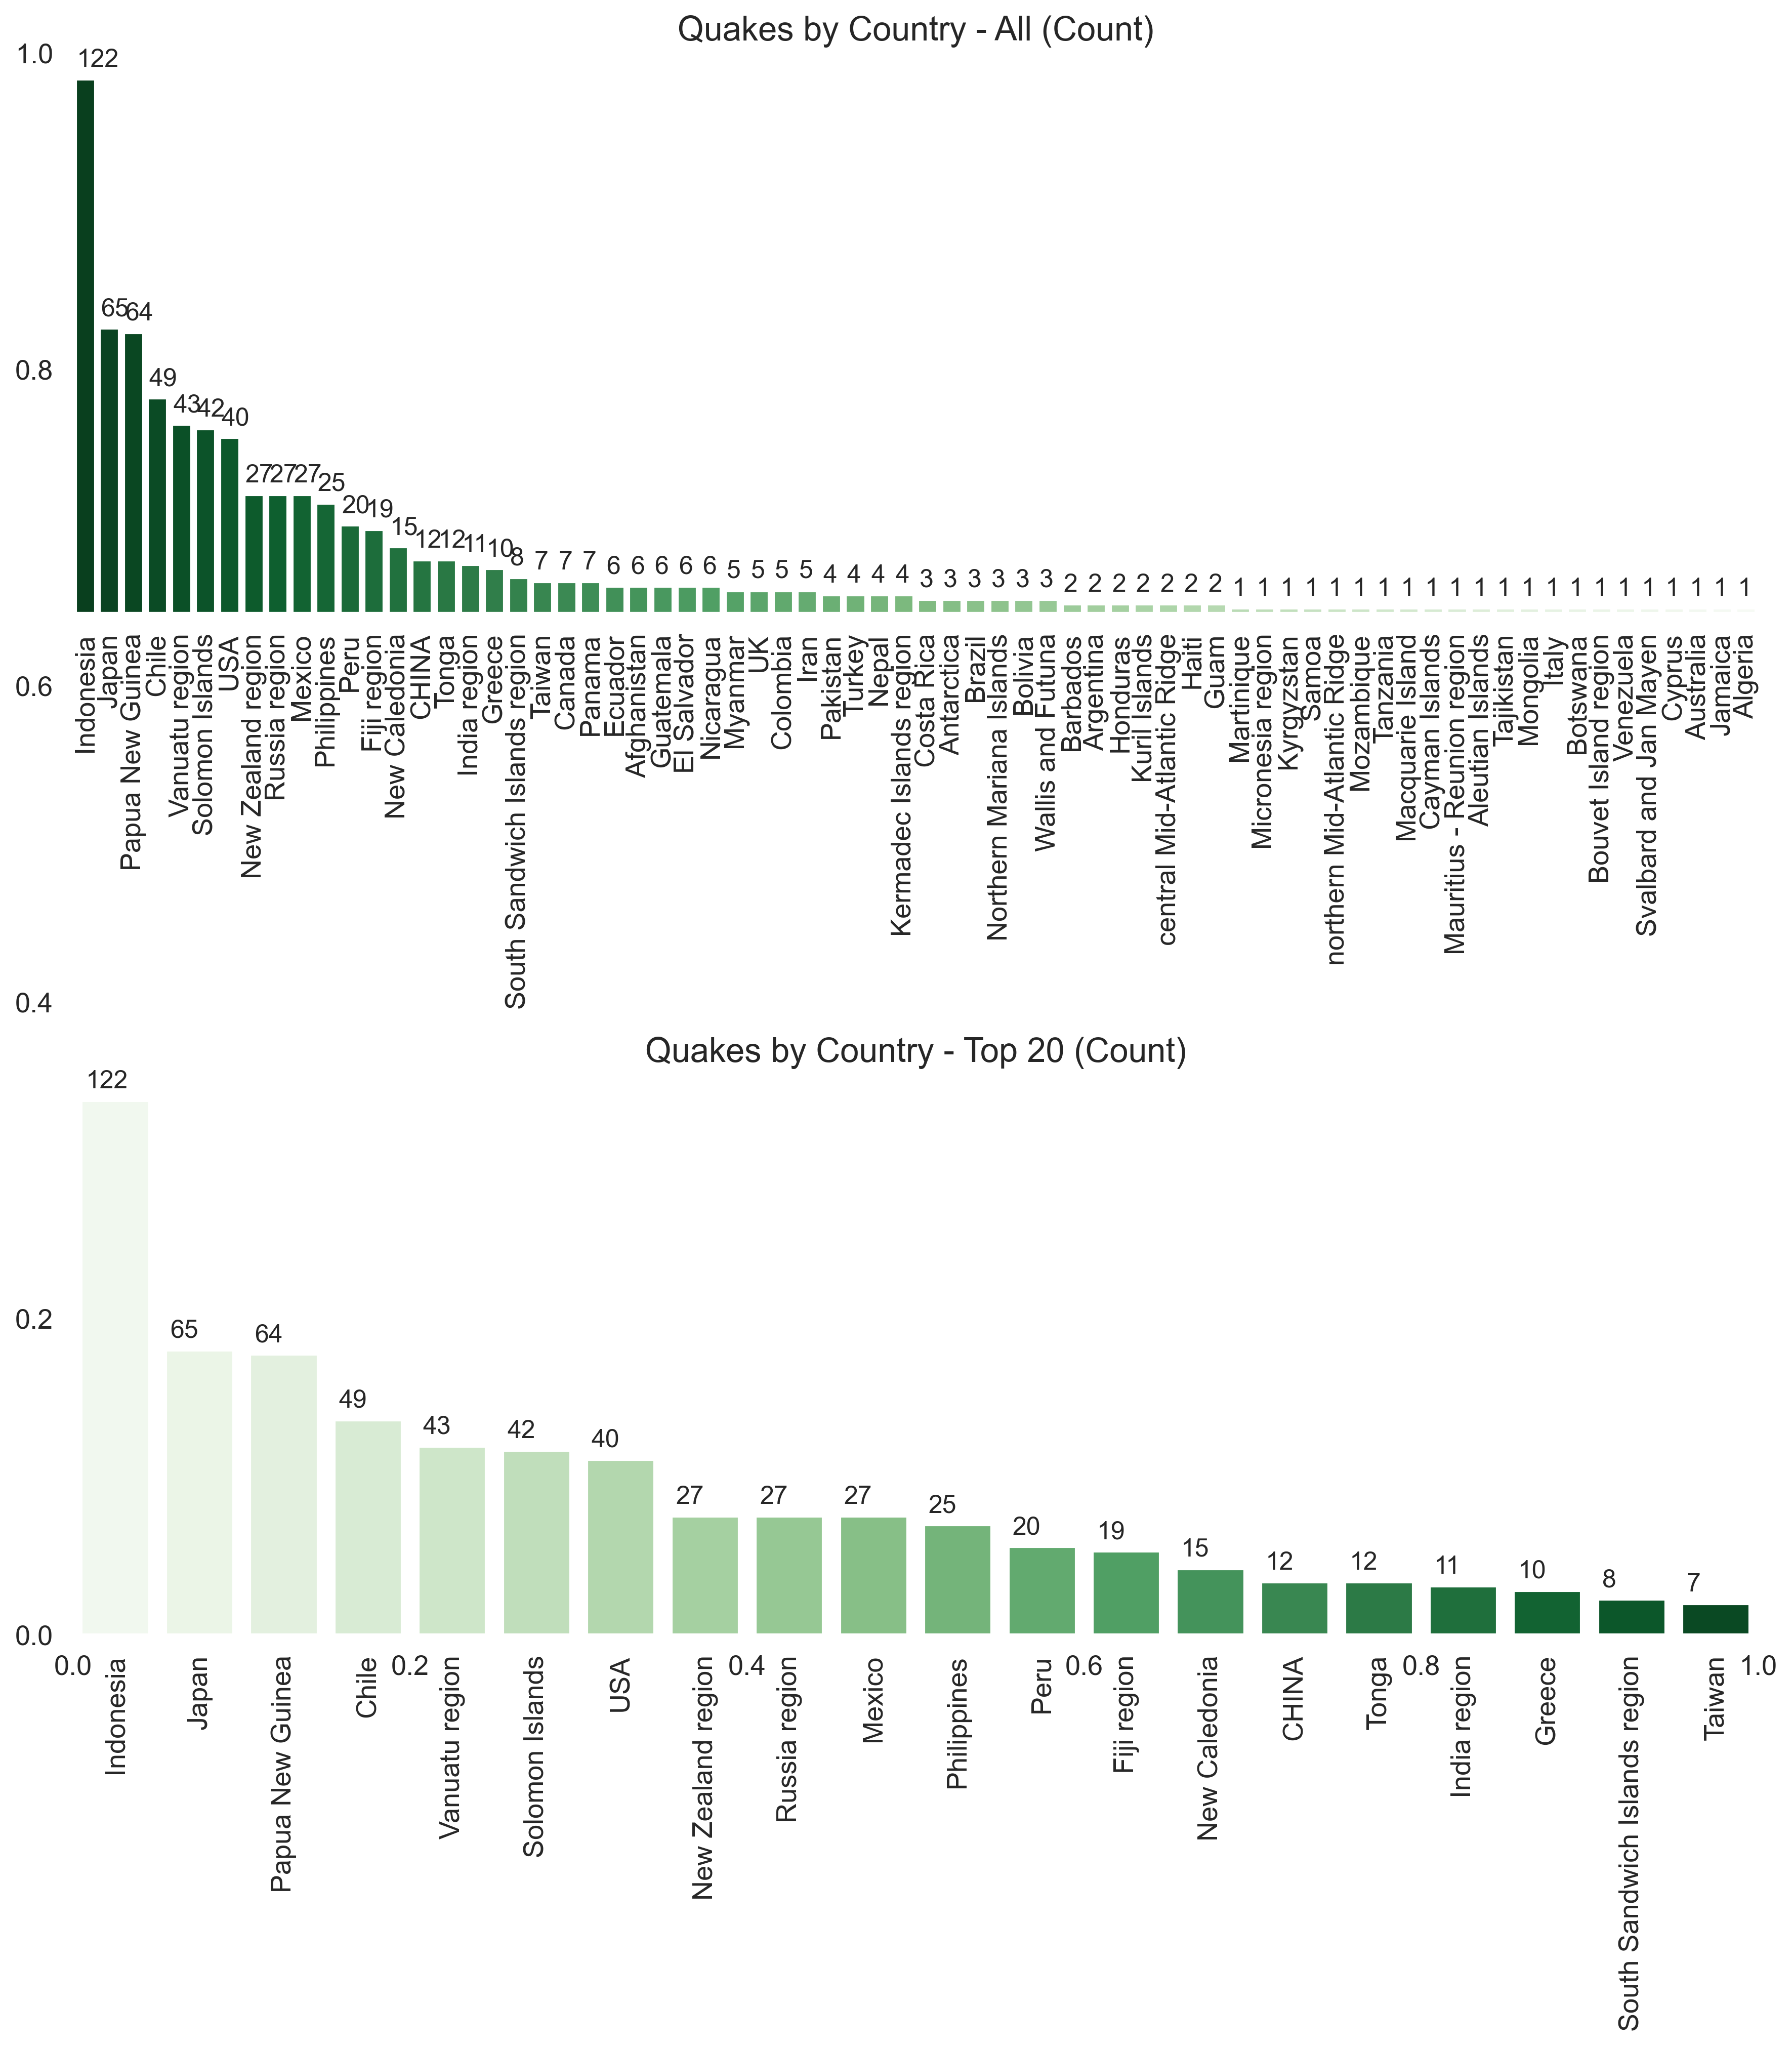

In [67]:
plt.subplots(figsize=(12,14))

plt.subplot(211)
plt.title('Quakes by Country - All (Count)', fontsize=16)
ax = sns.countplot(x=df_country['country'], palette='Greens_r', alpha=1, order=df_country['country'].value_counts().index)

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))

plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])


# Let's check first 20 countries
plt.subplot(212)
plt.title('Quakes by Country - Top 20 (Count)', fontsize=16)
ax = sns.countplot(x=df_country['country'], palette='Greens', alpha=1, order=df_country['country'].value_counts().head(20).index)

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+3))

plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.show()

## Let's install folium
```pip install folium```
this to get the data on map

In [68]:
import folium
from folium import plugins

### Let's check the tsunamis due to earthquakes near Indonesia 

(Text(0, 0.5, ''),
 ([], []),
 ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
  [Text(0, 0, '2001'),
   Text(1, 0, '2002'),
   Text(2, 0, '2003'),
   Text(3, 0, '2005'),
   Text(4, 0, '2006'),
   Text(5, 0, '2007'),
   Text(6, 0, '2009'),
   Text(7, 0, '2010'),
   Text(8, 0, '2011'),
   Text(9, 0, '2012'),
   Text(10, 0, '2013'),
   Text(11, 0, '2014'),
   Text(12, 0, '2015'),
   Text(13, 0, '2016'),
   Text(14, 0, '2017'),
   Text(15, 0, '2018'),
   Text(16, 0, '2019'),
   Text(17, 0, '2020'),
   Text(18, 0, '2022')]),
 Text(0.5, 0, ''))

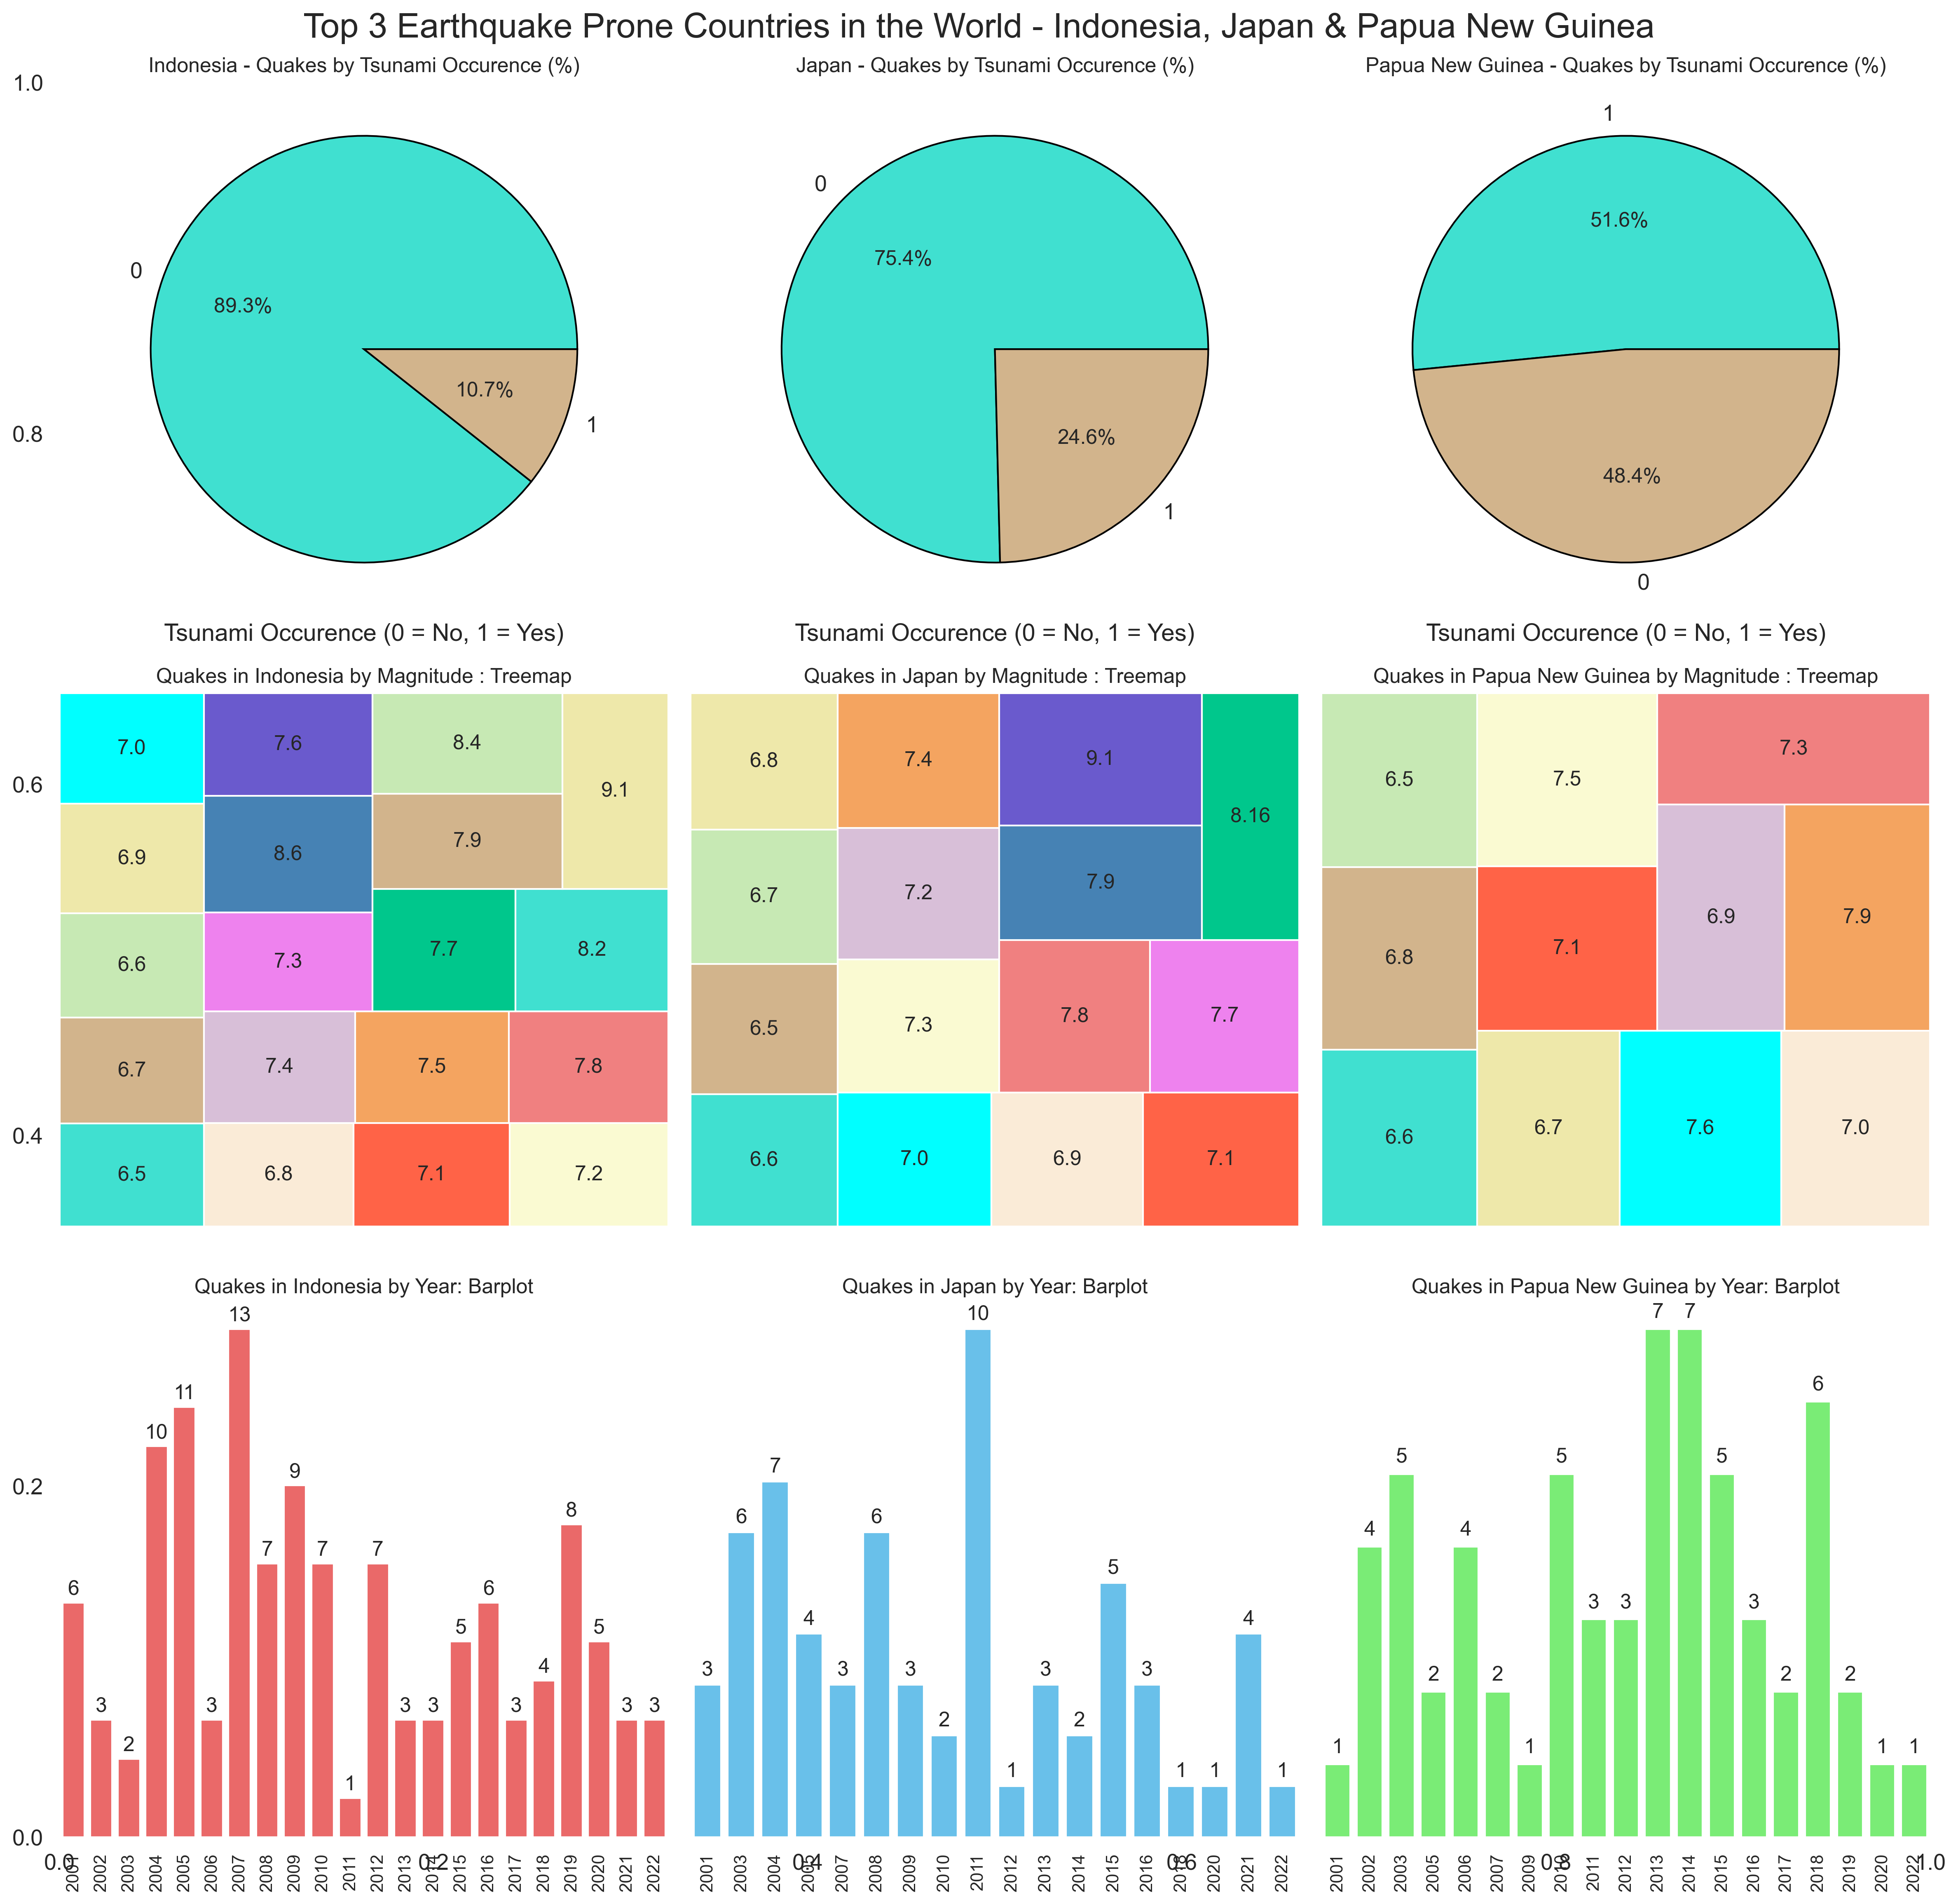

In [72]:
plt.subplots(figsize=(16,16))
plt.suptitle('Top 3 Earthquake Prone Countries in the World - Indonesia, Japan & Papua New Guinea', fontsize=20)

plt.subplot(3,3,1)
plt.title('Indonesia - Quakes by Tsunami Occurence (%)')
df_country[df_country['country'] == 'Indonesia']['tsunami'].value_counts().plot(kind='pie',
subplots=True, colors = my_col, legend=None, ylabel='', wedgeprops={'alpha':1, 'edgecolor' : 'black','linewidth': 1, 'antialiased': True}, 
autopct='%1.1f%%'
)
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)', fontsize=14)

## JAPAN
plt.subplot(3,3,2)
plt.title('Japan - Quakes by Tsunami Occurence (%)')
df_country[df_country['country'] == 'Japan']['tsunami'].value_counts().plot(kind='pie',
subplots=True, colors = my_col, legend=None, ylabel='', wedgeprops={'alpha':1, 'edgecolor' : 'black','linewidth': 1, 'antialiased': True}, 
autopct='%1.1f%%'
)
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)', fontsize=14)


## Papua New Guinea
plt.subplot(3,3,3)
plt.title('Papua New Guinea - Quakes by Tsunami Occurence (%)')
df_country[df_country['country'] == 'Papua New Guinea']['tsunami'].value_counts().plot(kind='pie',
subplots=True, colors = my_col, legend=None, ylabel='', wedgeprops={'alpha':1, 'edgecolor' : 'black','linewidth': 1, 'antialiased': True}, 
autopct='%1.1f%%'                                                                                 
)
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)', fontsize=14)


### INDONESISA Sqaurify PLOT
plt.subplot(3,3,4)
plt.title('Quakes in Indonesia by Magnitude : Treemap')
labels = df_country[df_country['country'] == "Indonesia"]['magnitude'].value_counts().index.get_level_values(0).tolist()
sizes = df_country[df_country['country'] == "Indonesia"]['magnitude'].value_counts().reset_index().magnitude.values.tolist()

squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=1)
plt.axis('off')

### JAPAN'
plt.subplot(3,3,5)
plt.title('Quakes in Japan by Magnitude : Treemap')
labels = df_country[df_country['country'] == "Japan"]['magnitude'].value_counts().index.get_level_values(0).tolist()
sizes = df_country[df_country['country'] == "Japan"]['magnitude'].value_counts().reset_index().magnitude.values.tolist()

squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=1)
plt.axis('off')

### Papua New Guinea
plt.subplot(3,3,6)
plt.title('Quakes in Papua New Guinea by Magnitude : Treemap')
labels = df_country[df_country['country'] == "Papua New Guinea"]['magnitude'].value_counts().index.get_level_values(0).tolist()
sizes = df_country[df_country['country'] == "Papua New Guinea"]['magnitude'].value_counts().reset_index().magnitude.values.tolist()

squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=1)
plt.axis('off')

### COUNTPLOTS

### INDONESIA
plt.subplot(3,3,7)
plt.title('Quakes in Indonesia by Year: Barplot')
ax = sns.countplot(x="Year", data=df_country[df_country['country'] == "Indonesia"], color='#FF5454', alpha=1)

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 0.1), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10, rotation=90), plt.xlabel(None)

### Japan
plt.subplot(3,3,8)
plt.title('Quakes in Japan by Year: Barplot')
ax = sns.countplot(x="Year", data=df_country[df_country['country'] == "Japan"], color='#54C8FF', alpha=1)

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 0.1), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10, rotation=90), plt.xlabel(None)

### Japan
plt.subplot(3,3,9)
plt.title('Quakes in Papua New Guinea by Year: Barplot')
ax = sns.countplot(x="Year", data=df_country[df_country['country'] == "Papua New Guinea"], color='#68FF63', alpha=1)

for p in ax.patches: 
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ p.get_width()/2, p.get_height() + 0.1), ha='center', va='bottom')
plt.ylabel(None), plt.yticks([]), plt.xticks(fontsize=10, rotation=90), plt.xlabel(None)

## Adding the data as heatmap on th MAP 

In [73]:
print('Earthquakes in Indonesia  -  Heat Map')
heat_map = df[['latitude', 'longitude']].values
Indonesia = folium.Map(location=[0,105], zoom_start=4)
Indonesia.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=15))
Indonesia

Earthquakes in Indonesia  -  Heat Map


In [77]:
print('Earthquakes in Japan  -  Heat Map')
heat_map = df[['latitude', 'longitude']].values
Japan = folium.Map(location=[35,140], zoom_start=4)
Japan.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=15))
Japan

Earthquakes in Japan  -  Heat Map


In [79]:
print('Earthquakes in Papua New Guinea  -  Heat Map')
heat_map = df[['latitude', 'longitude']].values
papua_new_guinea = folium.Map(location=[-5,145], zoom_start=4)
papua_new_guinea.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=15))
papua_new_guinea

Earthquakes in Papua New Guinea  -  Heat Map


____

## Earthqaukes across the World

In [80]:
print('Earthquakes in World  -  Heat Map')
heat_map = df[['latitude', 'longitude']].values
world = folium.Map(location=[df['latitude'].mean(),df['longitude'].mean()], zoom_start=1)
world.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=15))
world

Earthquakes in World  -  Heat Map


____
## Thank You